# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Load the data

Load the ‘Bank_data.csv’ dataset.

In [73]:
df = pd.read_csv("Bank_data.csv")

In [74]:
df.describe(include = "all")

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [75]:
df.head()


,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [76]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
interest_rate    518 non-null float64
credit           518 non-null float64
march            518 non-null float64
may              518 non-null float64
previous         518 non-null float64
duration         518 non-null float64
y                518 non-null object
dtypes: float64(6), object(1)
memory usage: 28.5+ KB


In [78]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

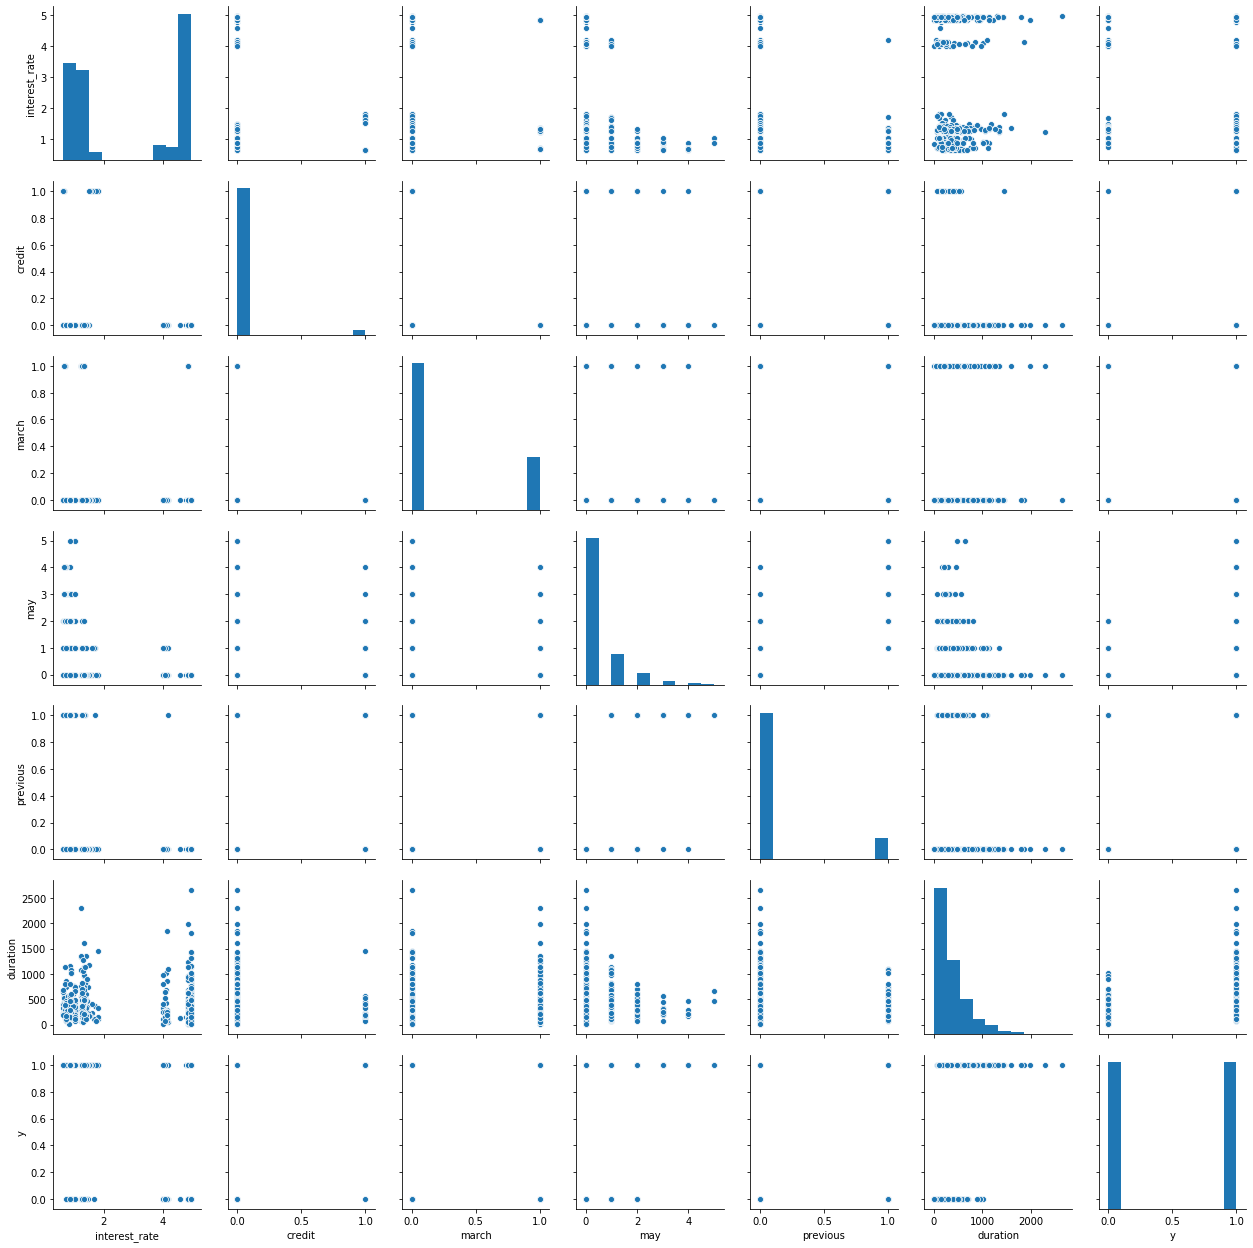

In [79]:
sns.pairplot(df)

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [80]:
x = df["duration"]
y = df['y']



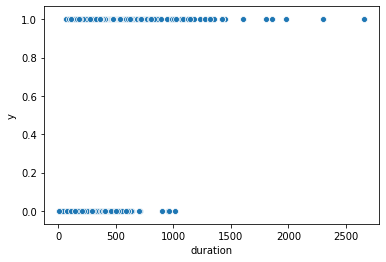

In [81]:
sns.scatterplot(x,y)

In [82]:
x1 = sm.add_constant(x)


C:\Users\mishaun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [83]:
reg = sm.Logit(y,x1)

In [84]:
reg_mod = reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [85]:
reg_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:                  0.2121
Time:                        11:27:06   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [86]:
y_pred_probs = reg_mod.predict()


In [87]:
y_pred = np.round(y_pred_probs)
x

0      117.0
1      274.0
2      167.0
3      686.0
4      157.0
       ...  
513    204.0
514    806.0
515    290.0
516    473.0
517    142.0
Name: duration, Length: 518, dtype: float64

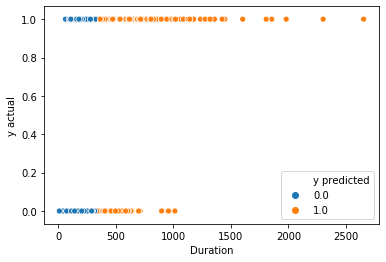

In [88]:
#want to see how model predicts against actual - create scatterplot
df_compare = pd.DataFrame(columns = ["Duration"])
df_compare["Duration"] = x
df_compare["y actual"] = y
df_compare["y predicted"] = y_pred
df_compare

sns.scatterplot(df_compare.Duration, df_compare["y actual"], data = df_compare, hue = "y predicted")

In [89]:
cm = reg_mod.pred_table()
cm

array([[204.,  55.],
       [104., 155.]])

In [90]:
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
accuracy

0.693050193050193

### Simple Logistic Regression

Run the regression and graph the scatter plot.

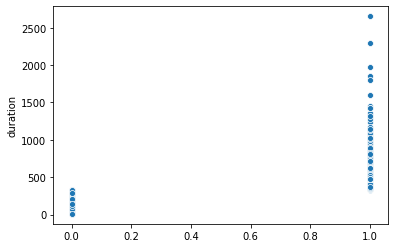

In [95]:
sns.scatterplot(y_pred, x)

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [100]:
#now adding multivariate model
xAll = df.drop("y", axis = 1)
xAll = sm.add_constant(xAll)
xAll

,const,interest_rate,credit,march,may,previous,duration
0,1.0,1.334,0.0,1.0,0.0,0.0,117.0
1,1.0,0.767,0.0,0.0,2.0,1.0,274.0
2,1.0,4.858,0.0,1.0,0.0,0.0,167.0
3,1.0,4.120,0.0,0.0,0.0,0.0,686.0
4,1.0,4.856,0.0,1.0,0.0,0.0,157.0
...,...,...,...,...,...,...,...
513,1.0,1.334,0.0,1.0,0.0,0.0,204.0
514,1.0,0.861,0.0,0.0,2.0,1.0,806.0
515,1.0,0.879,0.0,0.0,0.0,0.0,290.0
516,1.0,0.877,0.0,0.0,5.0,1.0,473.0


In [106]:
regAll = sm.Logit(y, xAll)
regAllMod = regAll.fit()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


In [107]:
regAllMod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Mon, 16 Mar 2020   Pseudo R-squ.:                  0.5153
Time:                        11:33:32   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1385      0.339     -0.408      0.683      -0.804       0.527
interest_rate    -0.7802      0.092     -8.471      0.000      -0.961      -0.600
credit            2.4028      1.090      2.205      0.027       0.267       4.538
march            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
may               0.1946      0.229      0.849      0.396      -0.255       0.644
previous          1.2746      0.583      2.186      0.029       0.132       2.417
duration          0.0070      0.001      9.386      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [108]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [109]:
confusion_matrix(xAll, y, regAllMod)

(array([[220.,  39.],
        [ 31., 228.]]), 0.8648648648648649)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [120]:
test_data = pd.read_csv("Bank_data_testing.csv")
test_data.drop("Unnamed: 0", axis = 1, inplace = True)
test_data["y"] = test_data["y"].map({"no": 0, "yes": 1})

In [121]:
test_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [124]:
xTest = test_data.drop("y", axis = 1)
xTest = sm.add_constant(xTest)

C:\Users\mishaun\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [125]:
yTest = test_data['y']

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [127]:
yTestPred = regAllMod.predict(xTest)

In [131]:
test_data.shape

(222, 7)

In [132]:
cm_Test, accuracy_Test = confusion_matrix(xTest, yTest, regAllMod)

In [133]:
cm_Test

array([[94., 17.],
       [12., 99.]])

In [134]:
accuracy_Test

0.8693693693693694

In [135]:
cm_Test.sum()

222.0